<center><h1>Artificial Intelligence Journals Ranking (2000 - 2021)</h1></center>

<center><h3>Vásquez, V., Cruz, J. & Henao, M.</h3></center>

<center><h2 style="margin-top:50px;">Abstract</h2></center>
<p>SCImago Journal & Country Rank is a publicly available portal that includes the journals and country scientific indicators developed from the Scopus database. With the dataset used in this document, it is possible to determine the trends of the subtopics covered in the documents published throughout the years and which journals are the most significant in the area.</p>

<strong>Keywords:</strong> Artificial Intelligence, Data analisis, Journal ranking

<h2>0. Setting Up Environment</h2>

In [60]:
# System variables
import os 
from glob import glob

# Data processing libraries
import numpy as np
import pandas as pd

# Dataset connection
import opendatasets as od

# Graphic tools 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

<h3>0.1. Download Dataset</h3>

<p>The dataset is downloaded from Kaggle using the opendatasets library.</p>

In [61]:
# ================
# Download dataset
# ================
od.download("https://www.kaggle.com/datasets/yasirabdaali/artificial-intelligence-journals-ranking-20002021", "./dataset")

Skipping, found downloaded files in "./dataset\artificial-intelligence-journals-ranking-20002021" (use force=True to force download)


<h3>0.2. Reading Dataset</h3>

In [62]:
def path_csvFiles (PATH = os.getcwd(),EXT = "*.csv"):  
    """
    Retrieve all files with a given extension (EXT = *.csv by default) from current
    working directory where the process is being implemented, using os.getcwd () 
    and the glob module, which finds all path names that resemble a specified pattern 
    according to the rules that are followed in a Unix terminal.
    
    Returns:6
        Returns a list with all the files path of the given extension 
    """
    list_paths = []
    for path, subdir, files in os.walk(PATH):
        for file in glob(os.path.join(path, EXT)):
            if file.find("scimagojr") != -1:
                list_paths.append(file)
    return list_paths


def concat_paths(all_paths):
    """receives a list of file directories with a CSV extension 
    and creates a dataset by concatenating each file
    and assigning each file a year label that is stored in the "Year" column,
    returning a dataframe

    Returns: 
        Returns a dataframe
    """

    all_df = []
    for path in all_paths:
        df = pd.read_csv(path, sep = ';')        
        df['Year'] = int(path.split()[1])
        all_df.append(df)
    
    df = pd.concat(all_df, ignore_index=True)
    return df 

In [63]:
# ===========================================================================
# The functions in charge of reading and joining the dataset tables are called
# ===========================================================================
df = concat_paths(path_csvFiles())

<h2>1. Understanding the dataset</h2>

In [64]:
# ===========================================
# Display the columns that make up the dataset
# ===========================================
df.columns.values.tolist()[:21]

['Rank',
 'Sourceid',
 'Title',
 'Type',
 'Issn',
 'SJR',
 'SJR Quartile',
 'H index',
 'Total Docs. (2000)',
 'Total Docs. (3years)',
 'Total Refs.',
 'Total Cites (3years)',
 'Citable Docs. (3years)',
 'Cites / Doc. (2years)',
 'Ref. / Doc.',
 'Country',
 'Region',
 'Publisher',
 'Coverage',
 'Categories',
 'Year']

<ul>
    <li><b>Rank:</b>  Consecutive number assigned to records by table </li>
    <li><b>Source ID:</b> Scopus Journal ID </li>
    <li><b>Title:</b> Journal’s title</li>
    <li><b>Type:</b> Type of publication (Journal, Book Series and Conference & Proceedings) </li>
    <li><b>ISSN:</b> International Standard Serial Number  </li>
    <li><b>SJR:</b> Weighted citations received in year X to documents published in the journal in years X-1, X-2 and X-3.</li>
    <li>
        <b>SJR Quartile:</b> Each thematic category is divided into quartiles.
        <ul>
            <li><b>Q1:</b> group made up of the first 25% of the journals on the list. </li>
            <li><b>Q2:</b> group that occupies from 25% to 50% </li>
            <li><b>Q3:</b> group that is positioned between 50% and 75% </li>
            <li><b>Q4:</b> group that is positioned between 75% and 100% </li>
        </ul>
    </li>
</ul>

<ul>
    <li>
        <b>H Index:</b>
        The h index expresses the journal's number of articles (h) that have received at least h citations. It quantifies both journal scientific productivity and scientific impact and it is also applicable to scientists, countries, etc.
    </li>
    <li>
        <b>Total Docs. (3years):</b>
        Published documents in the three previous years
    </li>
    <li>
        <b>Total Refs:</b>
        All the bibliographical references in a journal in the selected period.
    </li>
    <li>
        <b>Total Cites (3years):</b>
        Number of citations received in the selected year by a journal to the documents published in the three previous years
    </li>
    <li>
        <b>Citable Docs. (3years):</b>
        Number of citable documents published by a journal in the three previous years
    </li>
    <li>
        <b>Cites / Doc. (2years):</b>
        Margin between citable documents and the total documents by a journal in the two previous years.
    </li>
    <li>
        <b>Ref. / Doc:</b>
        Margin between all the bibliographical references in a journal in the selected period and the total documents published
    </li>
    <li>
        <b>Publisher:</b> Journal Publisher.
    </li>
    <li>
        <b>Coverage:</b>
        The length of time, e.g. years, for which journals are published.
    </li>
    <li>
        <b>Categories:</b>
        Journal key words
    </li>
</ul>
<br>

In [65]:
df.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2000),Total Docs. (3years),...,Total Docs. (2012),Total Docs. (2013),Total Docs. (2014),Total Docs. (2015),Total Docs. (2016),Total Docs. (2017),Total Docs. (2018),Total Docs. (2019),Total Docs. (2020),Total Docs. (2021)
0,1,12872,Cognitive Psychology,journal,"10955623, 00100285","3,109",Q1,123,17.0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,22478,Journal of Memory and Language,journal,"10960821, 0749596X","2,933",Q1,156,60.0,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24254,IEEE Transactions on Pattern Analysis and Mach...,journal,01628828,"1,698",Q1,377,128.0,427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,24157,Autonomous Agents and Multi-Agent Systems,journal,"15737454, 13872532","1,679",Q1,72,14.0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24242,IEEE Transactions on Fuzzy Systems,journal,10636706,"1,582",Q1,202,72.0,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

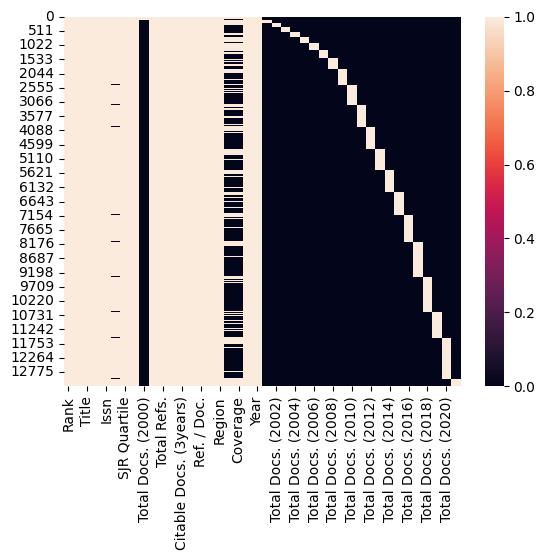

In [66]:
# ===================================================================================================
# Plot rectangular df as a color-encoded matrix
# Visualization in heatmap of the columns that represent gaps to develop strategies to correct them
# ===================================================================================================
sns.heatmap(df.notnull())

<AxesSubplot: >

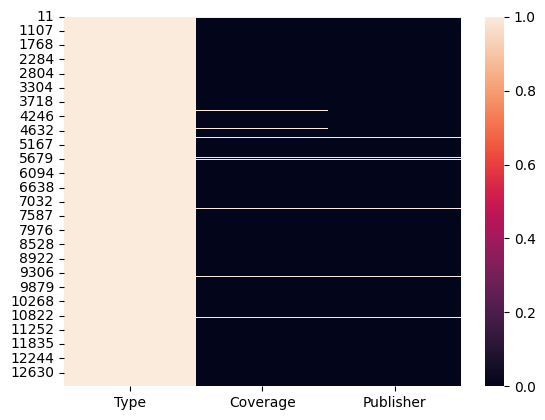

In [67]:
# ===================================================================================
# Plot rectangular df as a color-encoded matrix. 
# In the Type column, the records that are 'Conference and Proceedings' are searched 
# and it is identified that in relation to the 'Coverage' and 'Publisher' columns, 
# most of the empty records are found
# ===================================================================================
sns.heatmap(df[(df['Type'] == "conference and proceedings")][["Type","Coverage","Publisher"]].notnull())

<h2>2. Preprocessing data</h2>

In [68]:
# ==================================================
# Keep only 'Journal' and 'Book Series' type records
# ==================================================
df = df.loc[(df['Type'] == 'journal') | (df['Type'] == 'book series')]

In [69]:
# ========================================================================================
# The data of the 'Total Docs.20##' columns is stored in the 'Total Docs column. per year'
# ========================================================================================
df['Total Docs. per Year'] = df[list(df.filter(regex  = '20'))].fillna('').astype(str).apply(lambda x: "".join(x), axis =1)
df['Total Docs. per Year'] = df['Total Docs. per Year'].astype(float)

In [70]:
# ============================================
# The columns 'Total Docs.20##' are eliminated
# ============================================
df.drop(list(df.filter(regex  = '20')), inplace = True, axis=1)

In [71]:
# ==============================================================
# Explore the data type columns and identify an assignment error
# ==============================================================
df.dtypes

Rank                        int64
Sourceid                    int64
Title                      object
Type                       object
Issn                       object
SJR                        object
SJR Quartile               object
H index                     int64
Total Docs. (3years)        int64
Total Refs.                 int64
Total Cites (3years)        int64
Citable Docs. (3years)      int64
Cites / Doc. (2years)      object
Ref. / Doc.                object
Country                    object
Region                     object
Publisher                  object
Coverage                   object
Categories                 object
Year                        int64
Total Docs. per Year      float64
dtype: object

In [72]:
# ====================================================================================
# Explore the values with the wrong mapping in detail and create a modification scheme
# ====================================================================================

for i in (5, 12, 13):
    print(f"\033[1m {df.columns[i]}:\n\033[0m {list((df[df.columns[i]]))[:30]}\n")

 SJR:
 ['3,109', '2,933', '1,698', '1,679', '1,582', '1,287', '1,192', '1,090', '1,050', '1,018', '0,996', '0,889', '0,844', '0,809', '0,787', '0,722', '0,706', '0,696', '0,680', '0,675', '0,658', '0,632', '0,619', '0,612', '0,586', '0,584', '0,534', '0,532', '0,531', '0,525']

 Cites / Doc. (2years):
 ['3,61', '2,72', '3,36', '3,76', '1,96', '2,56', '1,27', '1,69', '2,72', '1,94', '2,68', '1,19', '1,23', '1,80', '2,23', '0,58', '0,77', '0,48', '1,91', '0,91', '1,65', '1,54', '1,37', '0,65', '1,31', '1,22', '0,89', '1,82', '0,70', '0,60']

 Ref. / Doc.:
 ['76,12', '47,17', '32,63', '42,93', '24,28', '34,91', '28,63', '72,90', '36,03', '45,82', '40,75', '35,85', '25,63', '31,15', '39,20', '23,63', '28,85', '21,88', '38,47', '37,19', '22,64', '15,68', '26,57', '31,09', '25,00', '8,99', '21,08', '42,43', '42,27', '22,95']



<h2>2.1. Modification scheme</h2>

In [73]:
# ===========================================================================
# The columns that were as an object with the float data type are established
# ===========================================================================
df['SJR'] = (df['SJR'].replace(',','.', regex=True).astype(float)).fillna(0)
df['Cites / Doc. (2years)'] = (df['Cites / Doc. (2years)'].replace(',','.', regex=True).astype(float))
df['Ref. / Doc.'] = (df['Ref. / Doc.'].replace(',','.', regex=True).astype(float))

<AxesSubplot: >

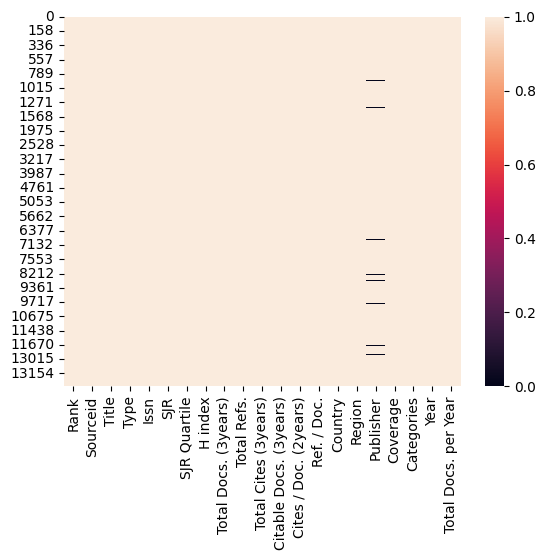

In [74]:
# ======================================================================================================
# The heatmap is made to verify the result of the treatment that was given to the columns that had empty
# ======================================================================================================
sns.heatmap(df.notnull())

In [75]:
# ===============
# Numeric columns
# ===============
int_df = df.select_dtypes(include=['int64', 'float']).copy()
print(f"[{len(int_df)} rows x {len(int_df.columns)} columns]")

[3575 rows x 12 columns]


In [76]:
# ===========================================================================
# Summarize the mean, standard deviation, min and max values in the dataframe
# ===========================================================================
int_df = int_df.reset_index(drop=True)
int_df[['SJR', 'H index', 'Total Docs. per Year']].describe().loc[['mean', 'std', 'min', 'max']].applymap(lambda x: f"{x:0.3f}")

,SJR,H index,Total Docs. per Year
mean,0.656,61.194,88.313
std,0.842,56.917,156.788
min,0.000,0.000,0.000
max,13.206,377.000,1776.000


In [77]:
# ===================
# Categorical columns
# ===================
obj_df = df.select_dtypes(include=['object']).copy()
print(f"[{len(obj_df)} rows x {len(obj_df.columns)} columns]\n")

#Categorical description
obj_df[['Title', 'Country', 'Region', 'Publisher', 'Categories']].describe().loc[['count', 'unique']]

[3575 rows x 9 columns]



,Title,Country,Region,Publisher,Categories
count,3575,3575,3575,3528,3575
unique,273,34,8,134,1033


In [78]:
# =================================
# Categorical columns sets overview
# =================================
i=0
while i<len(obj_df.columns):    
    print(("\033[1m {}: \n \033[0m {}\n").format(obj_df.columns[i],list(set(obj_df[obj_df.columns[i]]))[:10]))
    i+=1

 Title: 
  ['Journal of Automated Reasoning', 'Journal of Cognitive Science', 'Synthesis Lectures on Artificial Intelligence and Machine Learning', 'International Journal of Information Technology (Singapore)', 'Kybernetes', 'Cognitive Science', 'Journal of Information Systems and Telecommunication', 'Psyche', 'Springer Tracts in Advanced Robotics', 'Nature Machine Intelligence']

 Type: 
  ['book series', 'journal']

 Issn: 
  ['08950849, 26400677', '10645462, 15309185', '10955623, 00100285', '23848766', '23327731', '15356698, 09226389', '2093744X, 15982645', '24686557, 24682322', '02783649, 17413176', '21978441, 16103947']

 SJR Quartile: 
  ['Q4', 'Q3', 'Q1', '-', 'Q2']

 Country: 
  ['Singapore', 'Pakistan', 'Iran', 'Argentina', 'Netherlands', 'Germany', 'Austria', 'Bahrain', 'Switzerland', 'United Kingdom']

 Region: 
  ['Western Europe', 'Africa/Middle East', 'Latin America', 'Middle East', 'Pacific Region', 'Asiatic Region', 'Eastern Europe', 'Northern America']

 Publisher: 
  

In [79]:
# ==============================
# Download consolidated dataframe
# ==============================
df.to_csv('./dataset/journalAI.csv',sep = ";", index=False)

<h2>Viz Context</h2>

<h2>References</h2>